In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [196]:
wine_load = load_wine()

In [197]:
wine_load

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [198]:
wine = pd.DataFrame(wine_load['data'], columns=wine_load['feature_names'])

In [199]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [200]:
wine['class'] = wine_load['target']

In [201]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

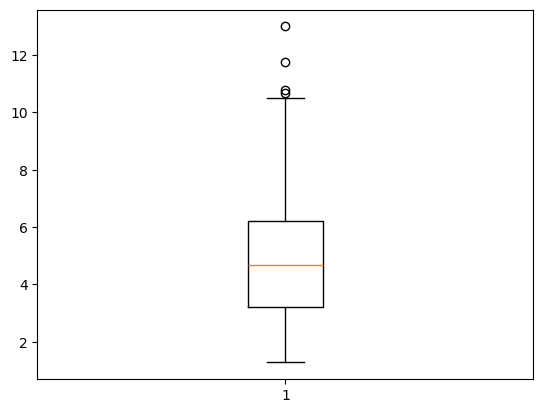

In [202]:
plt.boxplot(wine['color_intensity'])
plt.show()

In [203]:
wine['color_intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: color_intensity, dtype: float64

In [204]:
q_1, q_3 = np.percentile(wine['color_intensity'], [25, 75])

In [205]:
print(q_1)
print(q_3)

3.2199999999999998
6.2


In [206]:
iqr = q_3 - q_1
upper_whis = q_3 + 1.5 * iqr
lower_whis = q_3 - 1.5 * iqr

In [207]:
flag = (wine['color_intensity'] <= upper_whis) & (wine['color_intensity'] >= lower_whis)
wine.loc[flag, :]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [208]:
def outliers_iqr(_df, *_cols, _cnt=1.5):
    result = dict()
    for col in _cols:
        q_1, q_3 = np.percentile(_df[col], [25, 75])
        iqr = q_3 - q_1
        upper_whis = q_3 + (_cnt * iqr)
        lower_whis = q_1 - (_cnt * iqr)
        print(f"""{col}컬럼의 데이터에 
              상단의 경계는{upper_whis}이고 
              하단이 경계는 {lower_whis}""")
        outlier = _df[(_df[col] > upper_whis) | (_df[col] < lower_whis)]
        
        result[col] = outlier
    return result

In [209]:
outliers = outliers_iqr(wine, 'color_intensity', 'proanthocyanins')

color_intensity컬럼의 데이터에 
              상단의 경계는10.670000000000002이고 
              하단이 경계는 -1.2500000000000009
proanthocyanins컬럼의 데이터에 
              상단의 경계는3.0이고 
              하단이 경계는 0.20000000000000018


In [210]:
outliers['color_intensity']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2


In [211]:
outliers['proanthocyanins']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562.0,1


In [212]:
df = wine.copy()

In [213]:
df.drop(outliers['color_intensity'].index, axis=0, inplace=True)

In [214]:
print(f'원본데이터의 길이는 : {len(wine)}')
print(f'이상치가 제거된 데이터의 길이는 : {len(df)}')

원본데이터의 길이는 : 178
이상치가 제거된 데이터의 길이는 : 174


In [215]:
df2 = wine.copy()

In [216]:
df2.loc[outliers['color_intensity'].index, 'color_intensity'] = \
    df2['color_intensity'].mean()

In [217]:
df2.loc[outliers['color_intensity'].index, 'color_intensity']

151    5.05809
158    5.05809
159    5.05809
166    5.05809
Name: color_intensity, dtype: float64

In [218]:
upper_whis = 10.67
lower_whis = -1.25

In [219]:
wine.loc[outliers['color_intensity'].index, 'color_intensity']

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

In [220]:
wine.loc[outliers['color_intensity'].index, 'color_intensity'].map(
    lambda x : upper_whis if x > upper_whis else lower_whis
)

151    10.67
158    10.67
159    10.67
166    10.67
Name: color_intensity, dtype: float64

In [221]:
for idx in outliers['color_intensity'].index:
    data = wine.loc[idx, 'color_intensity']
    if data > upper_whis:
        wine.loc[idx, 'color_intensity'] = upper_whis
    elif data < lower_whis:
        wine.loc[idx, 'color_intensity'] = lower_whis

In [222]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [227]:
wine['class'] = wine['class'].map(
    {
        0: 'Class_0',
        1: 'Class_1',
        2: 'Class_2'
    }
)

In [229]:
wine['class'].value_counts()

class
Class_1    71
Class_0    59
Class_2    48
Name: count, dtype: int64

In [232]:
wine_dummy = pd.get_dummies(wine, columns=['class'])

In [233]:
wine_dummy['class_Class_0'].value_counts()

class_Class_0
False    119
True      59
Name: count, dtype: int64

In [234]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [236]:
iris_load = load_iris()

In [237]:
iris = pd.DataFrame(iris_load['data'], columns=iris_load['feature_names'])
iris['class'] = iris_load['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [238]:
iris['class'] = iris['class'].map(
    {
        0: 'Setosa',
        1: 'Versicolor',
        2: 'Virginica'
    }
)

In [239]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [240]:
iris['class'].value_counts()

class
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [307]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1), 
    iris['class'],
    test_size = 0.2,
    random_state = 1000,
    shuffle=True
)

In [308]:
print(f'학습 데이터의 수 : {len(x_train)} 테스트데이터의 수 : {len(x_test)}')
print(f'학습 데이터의 수 : {len(y_train)} 테스트데이터의 수 : {len(y_test)}')

학습 데이터의 수 : 120 테스트데이터의 수 : 30
학습 데이터의 수 : 120 테스트데이터의 수 : 30


In [309]:
y_train.value_counts()

class
Setosa        41
Virginica     41
Versicolor    38
Name: count, dtype: int64

In [313]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.drop('class', axis=1),
    iris['class'],
    test_size = 0.2,
    stratify = iris['class'],
    random_state=10
)

In [314]:
Y_train.value_counts()

class
Virginica     40
Versicolor    40
Setosa        40
Name: count, dtype: int64